In [1]:
import numpy as np 
import pandas as pd
import matplotlib as plt
import seaborn as sn
%matplotlib inline


In [2]:
data = pd.read_csv('train_cab.csv')

In [3]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [6]:
data =   data.drop([1123], axis = 0)

Now, we can convert the fare_amount column of ours into float datatype.

In [7]:
 data['fare_amount'] = pd.to_numeric(data['fare_amount'])

In [8]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16066.000000,16066.000000,16066.000000,16066.000000,16011.000000
mean,15.015004,-72.462693,39.914672,-72.462233,39.897851,2.625171
std,430.460945,10.578707,6.826797,10.575384,6.187276,60.846021
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734924,-73.991182,40.734647,1.000000
50%,8.500000,-73.981700,40.752603,-73.980174,40.753566,1.000000
75%,12.500000,-73.966837,40.767377,-73.963642,40.768010,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16066 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16066 non-null object
pickup_longitude     16066 non-null float64
pickup_latitude      16066 non-null float64
dropoff_longitude    16066 non-null float64
dropoff_latitude     16066 non-null float64
passenger_count      16011 non-null float64
dtypes: float64(6), object(1)
memory usage: 1004.1+ KB


Now, dropping the na values and thne trying to remove the outliers from our data.

In [10]:
data = data.dropna()

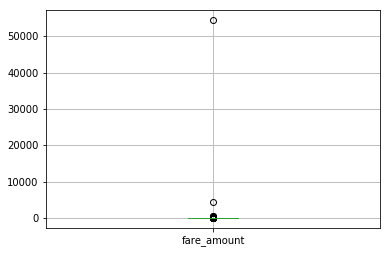

In [11]:
data.boxplot(column = 'fare_amount')

In [12]:
con_column = ['fare_amount']

for i in con_column:
    q75,q25 = np.percentile(data.loc[:,i], [75,25])
    
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    data = data.drop(data[data.loc[:,i]<min].index)
    data = data.drop(data[data.loc[:,i]>max].index)

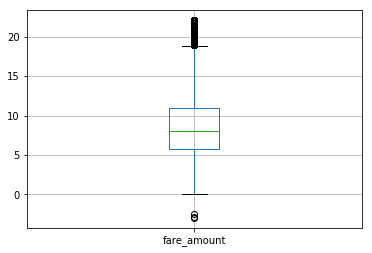

In [13]:
data.boxplot(column = 'fare_amount')

Now, as we can see from our data describe function that maximum values of passengers is in thousands which is not possible at all.
So, we got to get rid of those kind of values.

In [14]:
data.passenger_count.unique()

array([1.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 5.000e+00, 4.000e+00,
       2.360e+02, 4.560e+02, 5.334e+03, 5.350e+02, 3.540e+02, 0.000e+00,
       5.540e+02, 5.300e+01, 3.500e+01, 3.450e+02, 5.345e+03, 5.360e+02,
       4.300e+01, 5.800e+01, 5.370e+02, 8.700e+01, 5.312e+02, 1.300e+00,
       1.200e-01, 5.570e+02])

Lets remove all the values except values till 6 which appears to be the largest integet value.

In [15]:
data = data.drop(data[data.loc[:,'passenger_count']>6].index)

In [16]:
data = data.drop(data[data.loc[:, 'passenger_count']< 1].index)

In [17]:
data = data.drop(data[data.loc[:, 'passenger_count']== 1.3].index)

In [18]:
data.passenger_count.unique()

array([1., 2., 3., 6., 5., 4.])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14518 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          14518 non-null float64
pickup_datetime      14518 non-null object
pickup_longitude     14518 non-null float64
pickup_latitude      14518 non-null float64
dropoff_longitude    14518 non-null float64
dropoff_latitude     14518 non-null float64
passenger_count      14518 non-null float64
dtypes: float64(6), object(1)
memory usage: 907.4+ KB


So, we have removed the outliers from our numerical variables.
Now, as we can see that maximum values of longitudes and latitudes are a bit higher than they can be. So, removing the values where values of latitudes are not between 0-90 and longitudes are not between 0 -180.

In [20]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000
mean,8.901030,-72.522640,39.949706,-72.511530,39.925033,1.646439
std,4.142251,10.387557,6.790393,10.418566,6.092544,1.266951
min,-3.000000,-74.229138,-74.006893,-74.227047,-73.994392,1.000000
25%,5.700000,-73.992421,40.736018,-73.991471,40.735997,1.000000
50%,8.000000,-73.982139,40.752689,-73.980851,40.753549,1.000000
75%,11.000000,-73.968620,40.766748,-73.966639,40.767247,2.000000
max,22.100000,40.766125,401.083332,40.802437,41.366138,6.000000


In [21]:
data = data.drop(data[data.loc[:, 'pickup_latitude'] > 90].index)

In [22]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,14517.000000,14517.000000,14517.000000,14517.000000,14517.000000,14517.000000
mean,8.901416,-72.522542,39.924830,-72.511431,39.924974,1.646483
std,4.142132,10.387908,6.093242,10.418918,6.092750,1.266983
min,-3.000000,-74.229138,-74.006893,-74.227047,-73.994392,1.000000
25%,5.700000,-73.992422,40.736012,-73.991471,40.735994,1.000000
50%,8.000000,-73.982140,40.752685,-73.980853,40.753540,1.000000
75%,11.000000,-73.968620,40.766747,-73.966652,40.767240,2.000000
max,22.100000,40.766125,41.366138,40.802437,41.366138,6.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14517 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          14517 non-null float64
pickup_datetime      14517 non-null object
pickup_longitude     14517 non-null float64
pickup_latitude      14517 non-null float64
dropoff_longitude    14517 non-null float64
dropoff_latitude     14517 non-null float64
passenger_count      14517 non-null float64
dtypes: float64(6), object(1)
memory usage: 907.3+ KB


Alright , so now we can safely say that all our missing values and outliers and datatypes and values are good and we can use these features to proceed.
So, first thing we want to do is to use our datatime column and convert that into columns  like year, month , date and hour.
Jumping into that.

We can also see that our datetime variable is actually recorded as object which can be changed into datetime type to make our task easier.

In [24]:
 data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], errors = "coerce")

In [25]:
data.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0


Longitudes and latitudes can be used to find  the distance between two points which seems to be a better feature cause it appears to be a linear relationship between them. Distance 

In [26]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,14517.000000,14517.000000,14517.000000,14517.000000,14517.000000,14517.000000
mean,8.901416,-72.522542,39.924830,-72.511431,39.924974,1.646483
std,4.142132,10.387908,6.093242,10.418918,6.092750,1.266983
min,-3.000000,-74.229138,-74.006893,-74.227047,-73.994392,1.000000
25%,5.700000,-73.992422,40.736012,-73.991471,40.735994,1.000000
50%,8.000000,-73.982140,40.752685,-73.980853,40.753540,1.000000
75%,11.000000,-73.968620,40.766747,-73.966652,40.767240,2.000000
max,22.100000,40.766125,41.366138,40.802437,41.366138,6.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14517 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          14517 non-null float64
pickup_datetime      14516 non-null datetime64[ns]
pickup_longitude     14517 non-null float64
pickup_latitude      14517 non-null float64
dropoff_longitude    14517 non-null float64
dropoff_latitude     14517 non-null float64
passenger_count      14517 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 907.3 KB


In [28]:
data.head(20)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0


In [29]:
for i in data:
    data['Year'] = data['pickup_datetime'].dt.year
    data['Month'] = data['pickup_datetime'].dt.month
    data['Date'] = data['pickup_datetime'].dt.day
    data['Day of Week'] = data['pickup_datetime'].dt.dayofweek
    data['Hour'] = data['pickup_datetime'].dt.hour

In [30]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0


In [31]:
data.Year.unique()

array([2009., 2010., 2011., 2012., 2013., 2014., 2015.,   nan])

Now, we will calculate haversin distance.

In [32]:
def haversine_distance(lat1, long1, lat2, long2):
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(data[lat1])
        phi2 = np.radians(data[lat2])
    
        delta_phi = np.radians(data[lat2]-data[lat1])
        delta_lambda = np.radians(data[long2]-data[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        data['H_Distance'] = d
    return d

In [33]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')


0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
5        3.787239
6        1.555807
7        4.155444
9        2.849627
10       1.374577
11       0.000000
12       0.717767
13       2.019384
14       1.671445
15       0.000000
16       2.609774
17       1.511904
18       0.921952
19       0.399179
20       1.686861
21       2.292470
22       0.924296
23       1.403958
24       1.017773
25       2.531947
27       0.328771
28       4.073463
29       0.808153
30       0.871913
33       1.381589
           ...   
16034    1.478911
16035    2.236055
16036    3.758805
16037    1.711032
16038    2.941770
16039    1.981039
16040    1.456346
16041    3.253381
16042    2.546337
16043    1.755990
16044    3.105214
16045    1.442334
16046    1.756779
16047    0.780375
16048    3.713784
16049    4.806617
16050    1.886438
16051    3.756046
16052    1.432945
16053    0.881922
16054    1.431465
16057    1.232410
16058    1.166085
16059    1.801638
16060    5

In [34]:
data2 = data.copy()

In [35]:
data = data2

In [36]:

data['distnace'] = haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [37]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance,distnace
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157,1.999157


In [38]:
data.drop(columns = ['distnace'])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,2011.0,1.0,6.0,3.0,9.0,3.787239
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,2012.0,11.0,20.0,1.0,20.0,1.555807
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,2012.0,1.0,4.0,2.0,17.0,4.155444
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2009.0,9.0,2.0,2.0,1.0,2.849627
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0,2012.0,4.0,8.0,6.0,7.0,1.374577


As now we are done with some basic eda , we can start with modelling.
To find out a good model lets plaot some graphs.


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14517 entries, 0 to 16065
Data columns (total 14 columns):
fare_amount          14517 non-null float64
pickup_datetime      14516 non-null datetime64[ns]
pickup_longitude     14517 non-null float64
pickup_latitude      14517 non-null float64
dropoff_longitude    14517 non-null float64
dropoff_latitude     14517 non-null float64
passenger_count      14517 non-null float64
Year                 14516 non-null float64
Month                14516 non-null float64
Date                 14516 non-null float64
Day of Week          14516 non-null float64
Hour                 14516 non-null float64
H_Distance           14517 non-null float64
distnace             14517 non-null float64
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.7 MB


In [40]:
cat_column = ['Year', 'Month','Date', 'Day of Week', 'Hour']
for i in cat_column:
       data[i] =  data[i].astype('category')

In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14517 entries, 0 to 16065
Data columns (total 14 columns):
fare_amount          14517 non-null float64
pickup_datetime      14516 non-null datetime64[ns]
pickup_longitude     14517 non-null float64
pickup_latitude      14517 non-null float64
dropoff_longitude    14517 non-null float64
dropoff_latitude     14517 non-null float64
passenger_count      14517 non-null float64
Year                 14516 non-null category
Month                14516 non-null category
Date                 14516 non-null category
Day of Week          14516 non-null category
Hour                 14516 non-null category
H_Distance           14517 non-null float64
distnace             14517 non-null float64
dtypes: category(5), datetime64[ns](1), float64(8)
memory usage: 1.2 MB


In [42]:
data['fare_amount'] = data['fare_amount'].astype('float')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14517 entries, 0 to 16065
Data columns (total 14 columns):
fare_amount          14517 non-null float64
pickup_datetime      14516 non-null datetime64[ns]
pickup_longitude     14517 non-null float64
pickup_latitude      14517 non-null float64
dropoff_longitude    14517 non-null float64
dropoff_latitude     14517 non-null float64
passenger_count      14517 non-null float64
Year                 14516 non-null category
Month                14516 non-null category
Date                 14516 non-null category
Day of Week          14516 non-null category
Hour                 14516 non-null category
H_Distance           14517 non-null float64
distnace             14517 non-null float64
dtypes: category(5), datetime64[ns](1), float64(8)
memory usage: 1.2 MB


Now, we can try and plat these variables with respect to each other.

C:\Users\Vikas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


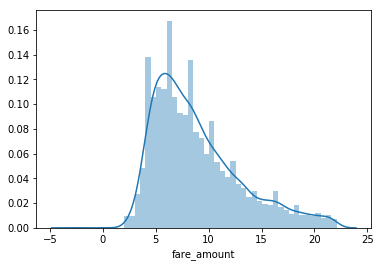

In [44]:
sn.distplot(data['fare_amount'])

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
data3 = data.copy()

In [47]:
data3 = data3.drop(axis = 0, columns = ['pickup_datetime'])

In [48]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14517 entries, 0 to 16065
Data columns (total 13 columns):
fare_amount          14517 non-null float64
pickup_longitude     14517 non-null float64
pickup_latitude      14517 non-null float64
dropoff_longitude    14517 non-null float64
dropoff_latitude     14517 non-null float64
passenger_count      14517 non-null float64
Year                 14516 non-null category
Month                14516 non-null category
Date                 14516 non-null category
Day of Week          14516 non-null category
Hour                 14516 non-null category
H_Distance           14517 non-null float64
distnace             14517 non-null float64
dtypes: category(5), float64(8)
memory usage: 1.1 MB


In [49]:
data3 =data3.dropna()

In [50]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14516 entries, 0 to 16065
Data columns (total 13 columns):
fare_amount          14516 non-null float64
pickup_longitude     14516 non-null float64
pickup_latitude      14516 non-null float64
dropoff_longitude    14516 non-null float64
dropoff_latitude     14516 non-null float64
passenger_count      14516 non-null float64
Year                 14516 non-null category
Month                14516 non-null category
Date                 14516 non-null category
Day of Week          14516 non-null category
Hour                 14516 non-null category
H_Distance           14516 non-null float64
distnace             14516 non-null float64
dtypes: category(5), float64(8)
memory usage: 1.1 MB


In [51]:
data3 = data3.drop(columns = ['distnace'])

In [52]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14516 entries, 0 to 16065
Data columns (total 12 columns):
fare_amount          14516 non-null float64
pickup_longitude     14516 non-null float64
pickup_latitude      14516 non-null float64
dropoff_longitude    14516 non-null float64
dropoff_latitude     14516 non-null float64
passenger_count      14516 non-null float64
Year                 14516 non-null category
Month                14516 non-null category
Date                 14516 non-null category
Day of Week          14516 non-null category
Hour                 14516 non-null category
H_Distance           14516 non-null float64
dtypes: category(5), float64(7)
memory usage: 981.6 KB


In [53]:
data3.shape

(14516, 12)

In [54]:
col_names = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count','Year', 'Month', 'Date', 'Hour', 'H_Distance']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    data3[col_names], data3['fare_amount'], test_size=0.25, random_state=25
)

In [56]:
from sklearn.linear_model import LinearRegression

Trying out linear regression as it is most common algorithm for regression task and also some features like H_Distance appears to have linear relationships with our data.


In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Vikas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


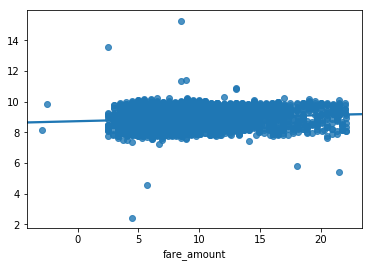

In [59]:
sn.regplot(y_test, y_pred)

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error  

In [61]:
mean_absolute_error(y_test, y_pred)

3.2804593601434506

In [62]:
mean_squared_error(y_test, y_pred)

17.53399098031526

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
model2 = RandomForestRegressor()


In [65]:
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

C:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
mean_absolute_error(y_test, y_pred2)

1.603751722237531

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
model3 = GradientBoostingRegressor()

In [69]:
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [105]:
mae = mean_absolute_error(y_test, y_pred3)


In [106]:
mae

1.4878742834017575

In [107]:

from sklearn.metrics import r2_score

In [72]:
r2_score(y_test, y_pred3)

0.7385193536968494

In [108]:
mse2 = mean_squared_error(y_test, y_pred2)

In [109]:
mse2

5.348069302011574

In [110]:
mse2 = mean_squared_error(y_test, y_pred3)

In [111]:
mse2

4.660292053020569

In [73]:
r2_score(y_test,y_pred2)

0.6999294032103327

In [112]:
r2_score(y_test, y_pred)

0.016199147683285564

In [74]:
from sklearn.linear_model import LogisticRegression

C:\Users\Vikas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


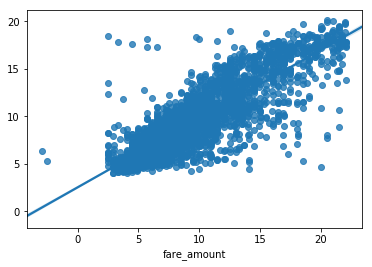

In [75]:
sn.regplot(y_test, y_pred3)

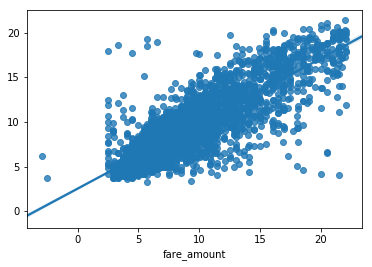

In [76]:
sn.regplot(y_test, y_pred2)

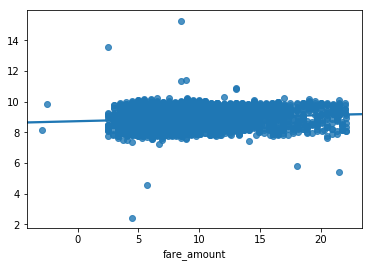

In [77]:
sn.regplot(y_test, y_pred)

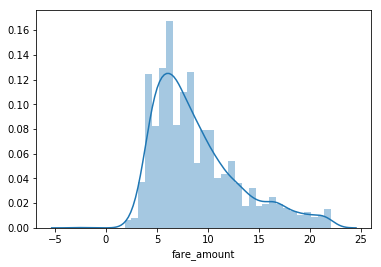

In [78]:
sn.distplot(y_test)

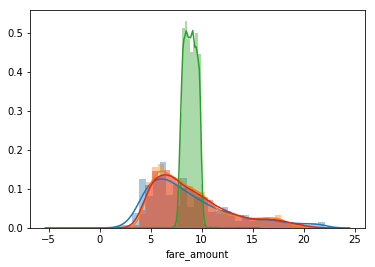

In [79]:
sn.distplot(y_test)
sn.distplot(y_pred3)
sn.distplot(y_pred)
sn.distplot(y_pred2)

In [113]:
 r2_score(y_test, y_pred)

0.016199147683285564

In [114]:
 r2_score(y_test, y_pred2)

0.6999294032103327

In [115]:
 r2_score(y_test, y_pred3)

0.7385193536968494

In [83]:
(n, p) = X_test.shape

In [84]:
n


3629

In [85]:
cons = (n-1)/(n-p-1)

In [86]:
adju_r2 = 1 -((1-r2_1)*cons)
adju_r2
    

0.013479963459082311

Now, as we are done with our model we can start working about our given test data and select whichever model works best.

In [87]:
test1 = pd.read_csv("test.csv")

In [88]:
test1.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


Converting our test data in the form of training data

In [89]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [90]:
test1['pickup_datetime'] = pd.to_datetime(test1['pickup_datetime'], errors = "coerce")

In [91]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null datetime64[ns]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 464.8 KB


In [92]:
def haversine_distance(lat1, long1, lat2, long2):
    
    for i in test1:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(test1[lat1])
        phi2 = np.radians(test1[lat2])
    
        delta_phi = np.radians(test1[lat2]-test1[lat1])
        delta_lambda = np.radians(test1[long2]-test1[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        test1['H_Distance'] = d
    return d

In [93]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')


0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [94]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
pickup_datetime      9914 non-null datetime64[ns]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
H_Distance           9914 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 542.2 KB


In [95]:
for i in test1:
    test1['Year'] = test1['pickup_datetime'].dt.year
    test1['Month'] = test1['pickup_datetime'].dt.month
    test1['Date'] = test1['pickup_datetime'].dt.day
    test1['Day of Week'] = test1['pickup_datetime'].dt.dayofweek
    test1['Hour'] = test1['pickup_datetime'].dt.hour

In [96]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
pickup_datetime      9914 non-null datetime64[ns]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
H_Distance           9914 non-null float64
Year                 9914 non-null int64
Month                9914 non-null int64
Date                 9914 non-null int64
Day of Week          9914 non-null int64
Hour                 9914 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 929.5 KB


In [97]:
test1 = test1.drop(columns = 'pickup_datetime')


In [98]:
test1.shape

(9914, 11)

In [99]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
H_Distance           9914 non-null float64
Year                 9914 non-null int64
Month                9914 non-null int64
Date                 9914 non-null int64
Day of Week          9914 non-null int64
Hour                 9914 non-null int64
dtypes: float64(5), int64(6)
memory usage: 852.1 KB


In [100]:
cat_column = ['Year', 'Month','Date', 'Day of Week', 'Hour']
for i in cat_column:
       test1[i] =  test1[i].astype('category')

In [101]:
y_pred_test1 = model.predict(test1)

ValueError: shapes (9914,11) and (10,) not aligned: 11 (dim 1) != 10 (dim 0)

In [ ]:
test1 = test1.drop(columns = 'Day of Week')

In [ ]:
y_pred_test1 = model3.predict(test1)

In [ ]:
y_pred_test1

In [ ]:
test2 = test1.copy()

In [ ]:
test2['fare_amount_pred'] = y_pred_test1

In [ ]:
test2.info()

In [ ]:
test2.head(10)

In [ ]:
test2.to_csv('Bike_renting.csv', index = False)